## Standard (Fully Connected) Neural Network
This code demonstrates use of fully connected networks, for the problem of handwritten digit classification. The dataset used is called MNIST. This notebook is a slightly modified version of the notebook provided at https://github.com/husnainfareed/MNIST-Handwritten-Digit-Recognition 


#### Loading Required packages and Data

In [1]:
###1. Load Data and Splot Data
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
X_train.shape # wow, 60k testdaten!
np.unique(Y_test) # 10 unterschiedliche werte; klar .. 0..9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Preprocessing

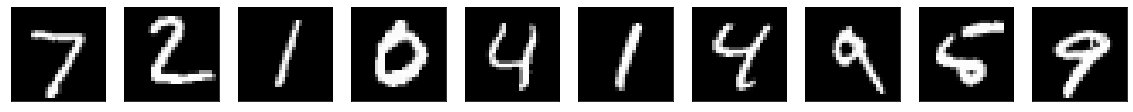

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [4]:
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)
New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


#### Setting up parameters

In [5]:
input_size = 784
batch_size = 200   
hidden1 = 400
hidden2 = 20

#### Building the FCN Model

In [6]:
###4.Build the model
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')
model.summary()

W0704 20:55:56.110653  8896 deprecation_wrapper.py:119] From c:\users\kurs\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 20:55:56.146627  8896 deprecation_wrapper.py:119] From c:\users\kurs\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 20:55:56.151620  8896 deprecation_wrapper.py:119] From c:\users\kurs\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 20:55:56.187594  8896 deprecation_wrapper.py:119] From c:\users\kurs\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.comp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                8020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


#### Training The Model

In [10]:
# Fitting on Data
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=30, verbose=2)
###5.Test 

Epoch 1/30
 - 2s - loss: 0.2622 - acc: 0.9266
Epoch 2/30
 - 2s - loss: 0.2528 - acc: 0.9290
Epoch 3/30
 - 2s - loss: 0.2444 - acc: 0.9317
Epoch 4/30
 - 2s - loss: 0.2366 - acc: 0.9339
Epoch 5/30
 - 2s - loss: 0.2294 - acc: 0.9358
Epoch 6/30
 - 2s - loss: 0.2226 - acc: 0.9377
Epoch 7/30
 - 2s - loss: 0.2164 - acc: 0.9395
Epoch 8/30
 - 2s - loss: 0.2103 - acc: 0.9412
Epoch 9/30
 - 2s - loss: 0.2047 - acc: 0.9427
Epoch 10/30
 - 2s - loss: 0.1992 - acc: 0.9444
Epoch 11/30
 - 2s - loss: 0.1942 - acc: 0.9456
Epoch 12/30
 - 2s - loss: 0.1893 - acc: 0.9473
Epoch 13/30
 - 2s - loss: 0.1847 - acc: 0.9482
Epoch 14/30
 - 2s - loss: 0.1802 - acc: 0.9492
Epoch 15/30
 - 2s - loss: 0.1758 - acc: 0.9506
Epoch 16/30
 - 2s - loss: 0.1717 - acc: 0.9516
Epoch 17/30
 - 2s - loss: 0.1678 - acc: 0.9531
Epoch 18/30
 - 2s - loss: 0.1642 - acc: 0.9541
Epoch 19/30
 - 2s - loss: 0.1605 - acc: 0.9548
Epoch 20/30
 - 2s - loss: 0.1569 - acc: 0.9557
Epoch 21/30
 - 2s - loss: 0.1536 - acc: 0.9566
Epoch 22/30
 - 2s - lo

#### Testing The Model

10000/10000 [==============================] - 0s 23us/step

Test accuracy: 0.96
[0 6 9 0 1 5 9 7 3 4]


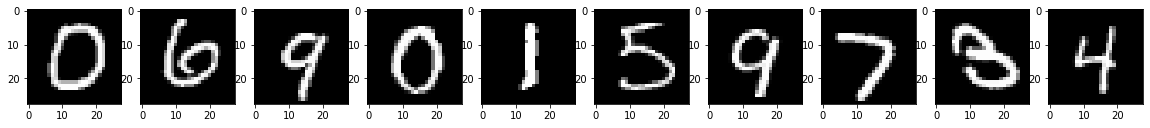

In [11]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(10,20)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()
plt.close()